In [1]:
import pandas as pd
import numpy as np
import requests
import json
import matplotlib.pyplot as plt
import seaborn
import scipy 
import sqlite3

In [2]:
#Get the relevant table from the SQL file
#Data from https://www.kaggle.com/rtatman/188-million-us-wildfires
# con = sqlite3.connect("./Fire Data/archive/FPA_FOD_20170508.sqlite")
# df = pd.read_sql_query("SELECT * from Fires",con)

# # Verify that result of SQL query is stored in the dataframe
# print(df.head())



In [3]:
# #Save df to csv

# df.to_csv("./FireTable.csv", index=False, header=True)

In [4]:
#Pull the new file and save to a data frame

# fire_file_one = "./FireTable.csv"

# fire_file_one_df = pd.read_csv(fire_file_one, encoding="ISO-8859-1")


# fire_file_one_df.head()






In [5]:
# fire_file_one_df.columns

In [6]:
#reduced DF columns

# df_reduced = pd.read_sql_query("Select OBJECTID, FOD_ID, FPA_ID, COMPLEX_NAME, FIRE_NAME,STAT_CAUSE_DESCR, FIRE_SIZE, DISCOVERY_DATE, STATE, FIRE_CODE from Fires",con)

# df_reduced.head()

In [7]:
# df_reduced.to_csv("./FireTable2.csv", index=False, header=True)

In [8]:
fire_file_reduced = "./FireTable2.csv"

fire_file_reduced_df = pd.read_csv(fire_file_reduced, encoding="ISO-8859-1")


fire_file_reduced_df.head()


C:\Users\RobertW\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3165: DtypeWarning: Columns (9) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,OBJECTID,FOD_ID,FPA_ID,COMPLEX_NAME,FIRE_NAME,STAT_CAUSE_DESCR,FIRE_SIZE,DISCOVERY_DATE,STATE,FIRE_CODE
0,1,1,FS-1418826,NaN,FOUNTAIN,Miscellaneous,0.10,2453403.5,CA,BJ8K
1,2,2,FS-1418827,NaN,PIGEON,Lightning,0.25,2453137.5,CA,AAC0
2,3,3,FS-1418835,NaN,SLACK,Debris Burning,0.10,2453156.5,CA,A32W
3,4,4,FS-1418845,NaN,DEER,Lightning,0.10,2453184.5,CA,NaN
4,5,5,FS-1418847,NaN,STEVENOT,Lightning,0.10,2453184.5,CA,NaN


In [9]:
count_cause_of_fire = fire_file_reduced_df["STAT_CAUSE_DESCR"].value_counts()
count_cause_of_fire

Debris Burning       429028
Miscellaneous        323805
Arson                281455
Lightning            278468
Missing/Undefined    166723
Equipment Use        147612
Campfire              76139
Children              61167
Smoking               52869
Railroad              33455
Powerline             14448
Fireworks             11500
Structure              3796
Name: STAT_CAUSE_DESCR, dtype: int64

([<matplotlib.axis.XTick at 0x218420fb850>,
 [Text(0, 0, 'Debris Burning'),
  Text(1, 0, 'Miscellaneous'),
  Text(2, 0, 'Arson'),
  Text(3, 0, 'Lightning'),
  Text(4, 0, 'Missing/Undefined'),
  Text(5, 0, 'Equipment Use'),
  Text(6, 0, 'Campfire'),
  Text(7, 0, 'Children'),
  Text(8, 0, 'Smoking'),
  Text(9, 0, 'Railroad'),
  Text(10, 0, 'Powerline'),
  Text(11, 0, 'Fireworks'),
  Text(12, 0, 'Structure')])

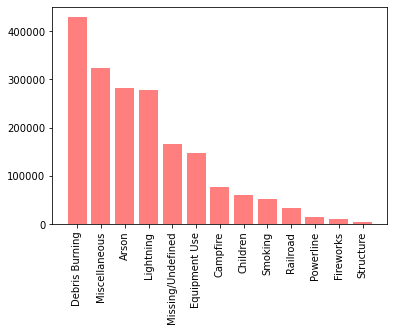

In [10]:
x_axis = np.arange(len(count_cause_of_fire))
plt.bar(x_axis, count_cause_of_fire, color='r', alpha=0.5, align="center")
tick_locations = [STAT_CAUSE_DESCR for STAT_CAUSE_DESCR in x_axis]
plt.xticks(tick_locations,["Debris Burning", "Miscellaneous", "Arson", "Lightning", "Missing/Undefined",
                            "Equipment Use", "Campfire", "Children", "Smoking", "Railroad",
                            "Powerline", "Fireworks", "Structure"], rotation="vertical" )


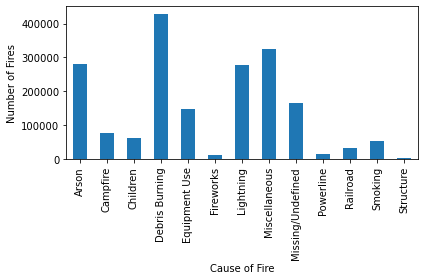

In [11]:
# Create a group based on the values in the 'maker' column
fire_cause_group = fire_file_reduced_df.groupby('STAT_CAUSE_DESCR')

# Count how many times each maker appears in our group
fire_cause_count = fire_cause_group['STAT_CAUSE_DESCR'].count()

# Create a bar chart based off of the group series from before
count_chart = fire_cause_count.plot(kind='bar')

# Set the xlabel and ylabel using class methods
count_chart.set_xlabel("Cause of Fire")
count_chart.set_ylabel("Number of Fires")


plt.tight_layout()
plt.show()

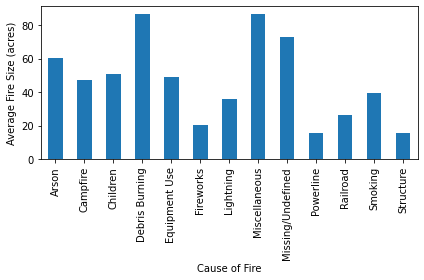

In [12]:
#FIRE_SIZE = Estimate of acres within the final perimeter of the fire

fire_cause_size_grouping = fire_file_reduced_df.groupby(['STAT_CAUSE_DESCR','FIRE_SIZE']).size().reset_index().groupby('STAT_CAUSE_DESCR')[[0]].mean()


fire_cause_size_grouping_chart = fire_cause_size_grouping.plot(kind='bar',legend=0)
fire_cause_size_grouping_chart.set_xlabel("Cause of Fire")
fire_cause_size_grouping_chart.set_ylabel("Average Fire Size (acres)")


plt.tight_layout()
plt.show()

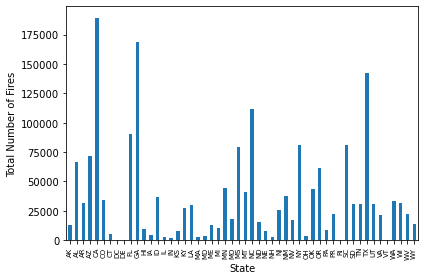

In [32]:
total_fires_by_state = fire_file_reduced_df.groupby(['STATE','FOD_ID']).size().reset_index().groupby('STATE')[[0]].sum()

total_fires_by_state_chart = total_fires_by_state.plot(kind='bar',legend=0,)
plt.tick_params(axis='x', which='major', labelsize=7)

total_fires_by_state_chart.set_xlabel("State")
total_fires_by_state_chart.set_ylabel("Total Number of Fires")

plt.tight_layout()
plt.show()